In [1]:
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version = 1)

In [3]:
X, y = mnist["data"], mnist["target"]
print(X.shape, y.shape)


(70000, 784) (70000,)


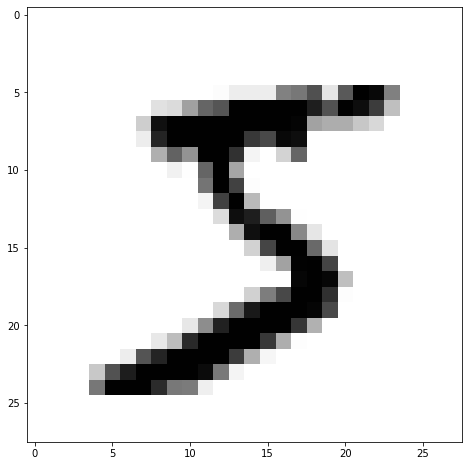

In [4]:
# Graph
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.figure(figsize = (16,8))
plt.imshow(some_digit_image, cmap = "binary")

# Label
y[0]

y = pd.to_numeric(y)

In [5]:
# Training and testing
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Binary Classification

In [6]:
y_train_5 = (y_train == 5)

# SGDC classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict(some_digit.reshape(1,-1))


array([ True])

In [8]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

# Confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)
conf_matrix = confusion_matrix(y_train_5, y_train_pred)

In [16]:
print("precision:", conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[0][1]))
print("recall:", conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[1][0]))

precision: 0.8370879772350012
recall: 0.6511713705958311


In [20]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function" )

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

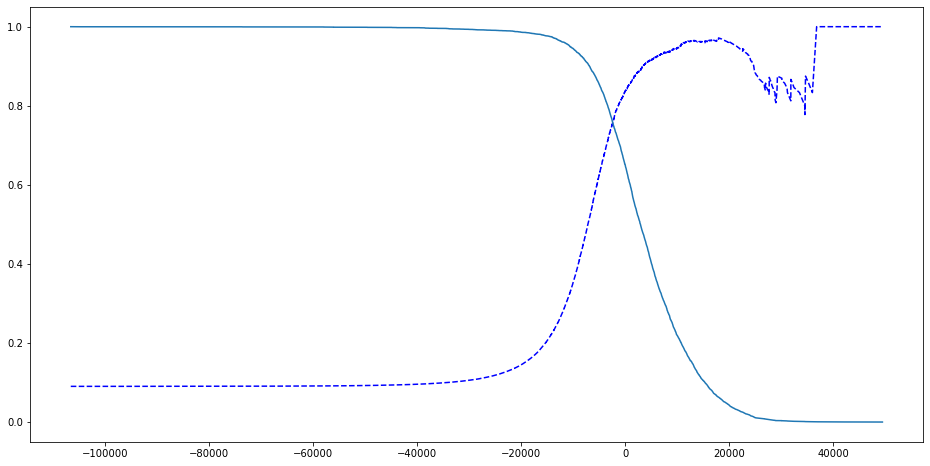

In [34]:
plt.figure(figsize= (16,8))
plt.plot(thresholds[:], precisions[:-1], "b--",label = "Precision")
plt.plot(thresholds[:], recalls[:-1], label = "Recall")

In [48]:
# Précision de 0.9
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]

# On retrain le modèle 
y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

Text(0, 0.5, 'True Positive Rate')

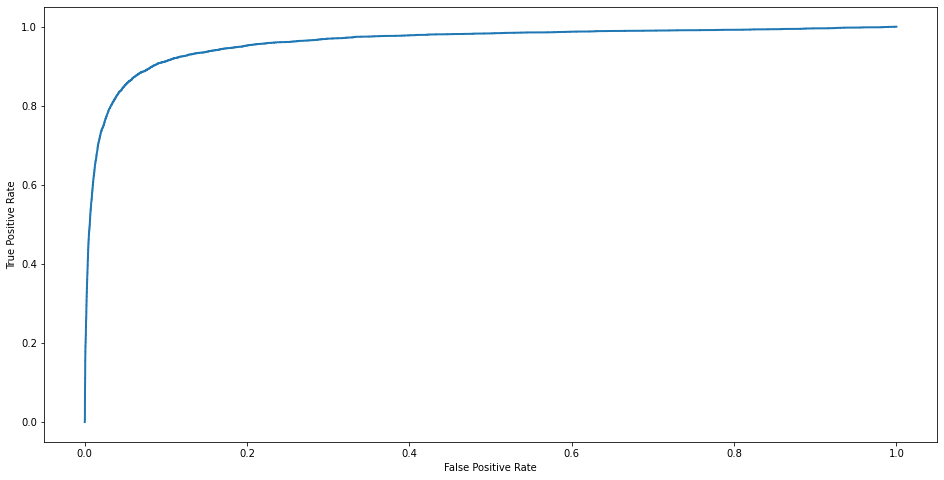

In [53]:
# ROC curve
from sklearn.metrics import roc_curve

plt.figure(figsize=(16,8))
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
plt.plot(fpr, tpr, linewidth = 2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [55]:
# Random Forest
from sklearn. ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = "predict_proba")

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

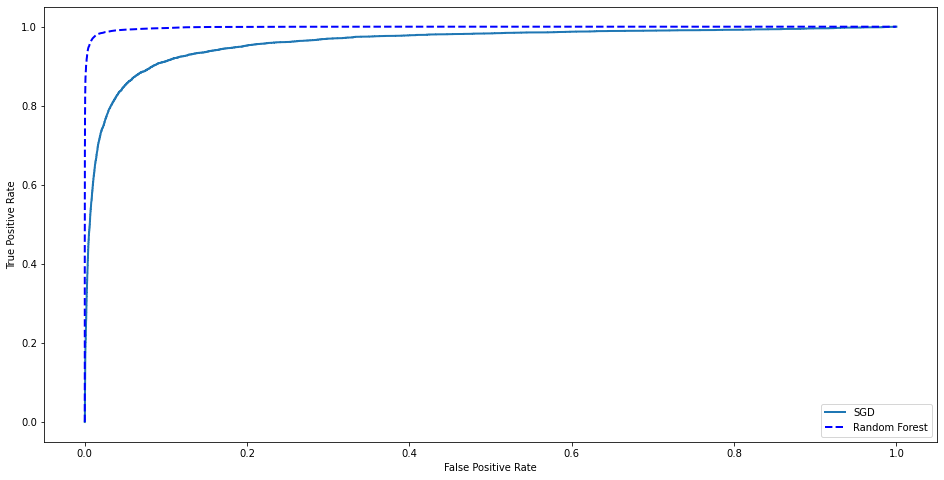

In [67]:
# Positive score
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, linewidth = 2, label = "SGD")
plt.plot(fpr_forest, tpr_forest, "b--",linewidth = 2, label = "Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc = "best")


## Multiclass Classification

In [69]:
# SVC
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)



SVC()

In [73]:
# Prédiction
svm_clf.predict(X[0].reshape(1,-1))
# Classification selon les 10 différentes classes
svm_clf.decision_function(X[0].reshape(1,-1))

# Cross-validation
cross_val_score(svm_clf, X_train, y_train, cv = 3, scoring = "accuracy")


array([0.977 , 0.9738, 0.9739])